# Homework 7. K-means and Recommendation system

***Double Click here to edit this cell***

- Name: 허성일
- Student ID: 201603727
- Submission date: 2020.06.20

## Problem 1 (10 pts): K-means

- We want to cluster data in sample_data_1.csv
- Estimate the best k for sample_data_1.csv
- You must show the process to find the best k
- use `sklearn.cluster.KMeans`

In [231]:
# YOUR CODE HERE. You may use as many code cells as you want.
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

import matplotlib.pyplot as plt

In [232]:
data = pd.read_csv('sample_data_1.csv')

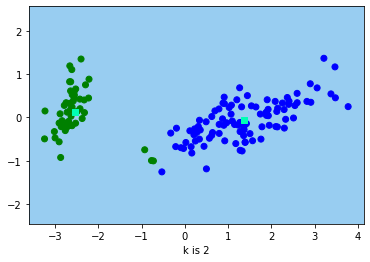

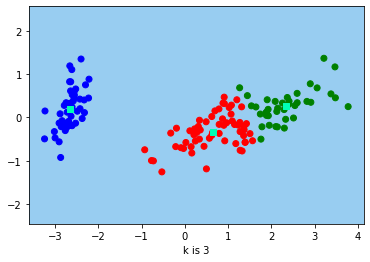

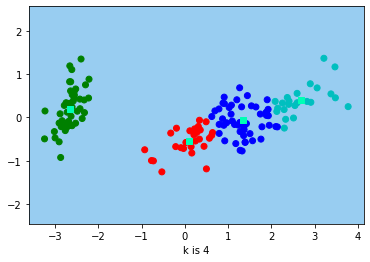

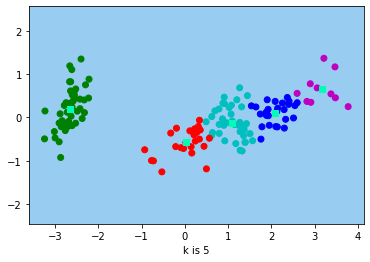

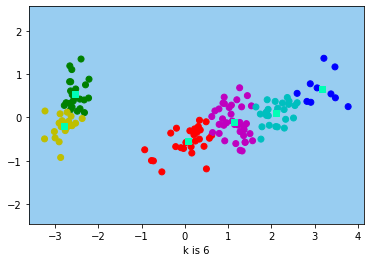

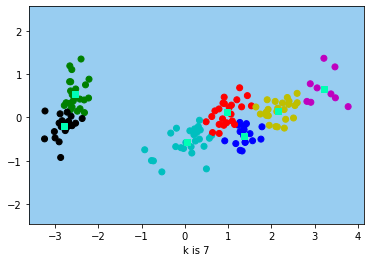

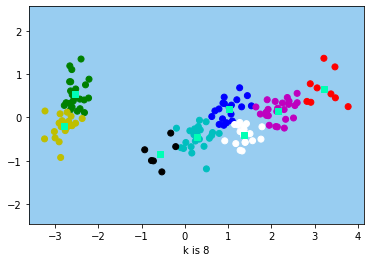

In [233]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data=pca.fit_transform(data)

for i in range(2,9):
    kmeans = KMeans(n_clusters=i).fit(pca_data)
    colormap='bgrcmykw'
    my_color = list(map(lambda i : colormap[i],kmeans.labels_))
    a,b=zip(*pca_data)
    plt.scatter(a,b,color=my_color)
    ac, bc = zip(*kmeans.cluster_centers_)
    plt.scatter(ac,bc,marker='s',color='#00ffb5')
    ax = plt.gca()
    ax.set_facecolor('#98cdf1')
    plt.xlabel('k is %d'%i)
    plt.axis('equal')
    plt.show()
    print()

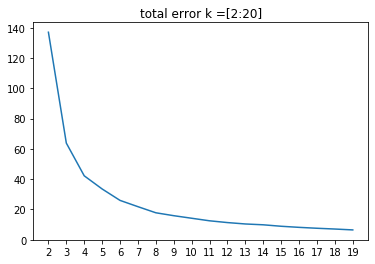

In [234]:
score_list=[]
for n in range(2,20):
    kmeans = KMeans(n_clusters=n).fit(pca_data)
    score_list.append(-kmeans.score(pca_data))
    
p1=plt.plot(list(range(2,20)),score_list)
plt.xticks(list(range(2,20)))
plt.title('total error k =[2:20]')
plt.show()

In [235]:
score_gap=[]
for i in range(len(score_list)-1):
    score_gap.append(round(score_list[i]-score_list[i+1],1))

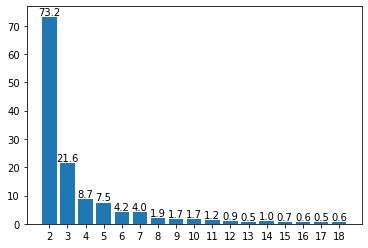

In [236]:
p1=plt.bar(list(range(2,len(score_gap)+2)),score_gap)
plt.xticks(list(range(2,len(score_gap)+2)))
for ii,rect in enumerate(p1):
    h1 = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2., h1, '%s'% (score_gap[ii]), ha = 'center', va='bottom')
plt.show()

### Your conclusion:
```
To edit, double-click here
tsne로 k를 변경시꼈을 때 분포를 확인했습니다.
원래 데이터로 k를 변경시켰을 때 error score를 그려보았고
그에 대한 차이를 막대그래프로 표현했습니다.
k가 3일때 차이가 21.6으로 많이 감소했지만
4부터는 10이하 score변화 적어서 k는 3이 적절하다고 판단했습니다.

```

## Problem 2 (40 pts): K-means implementation

- Make your own implementaion of K-means algorithm
- If the sum of distances between previous centroids and current centroids is less than or equal to `EPSILON`, K-means stops.
- If K-means algorithm reaches the maximum number of iterations `max_iter`, it stops.
- In `fit` method, you must run k-means in `n_init` times with different centroid seeds. Then choose the best.
- `fit` method computes centroids and labels and stores them in `self.cluster_centers_` and `self.labels_`
- `predict` method returns the centroids closest to each point in `X`
- `score` method returns **the negative of** the sum of sqaured distances between each point in `X` and the centroid closest to the point.

In [237]:
import numpy as np

class MyKMeans:
    """performs k-means clustering using numpy"""

    def __init__(self, n_clusters=8, n_init=10, EPSILON=1e-4, max_iter=300, random_state=0):
        self.n_clusters = n_clusters        # number of clusters
        self.n_init = n_init                # number of time the k-means algorithm will be run with different centroid seeds.
        self.EPSILON = EPSILON              # EPSILON; stop if the sum of centroid movements <= EPSILON
        self.max_iter = max_iter            # maximum number of iterations
        self.random_state = random_state    # random number seed
        self.cluster_centers_ = None        # means of clusters
        self.labels_ = None                 # X's assignments to clusters
        self.max_score = -np.inf
        
    def fit(self, X): #중심과 레이블을 계산하여 self.cluster_centers_와 self.labels_에 저장
        X = X.astype(float)
        # FILL OUT
        def r(n_init):
            np.random.seed(n_init)
            self.cluster_centers_ = X[np.random.choice(X.shape[0], size = self.n_clusters, replace = False),:]#randly하게 초기값 선택
            assignments = np.zeros(X.shape[0],dtype=np.int32) #일단 0으로 꽉채s움
            new_assignments = np.zeros(X.shape[0],dtype=np.int32) #일단 0으로 꽉채s움
            new_centers = np.zeros(X.shape[1]*self.n_clusters).reshape(self.n_clusters,X.shape[1])
            for i in range(self.max_iter):#새로운 class
                for k in range(X.shape[0]):
                    new_assignments[k] = np.argmin(np.sum((X[k]-self.cluster_centers_)**2,axis=1))

                for j in range(self.n_clusters):#새로운 center
                    new_centers[j]=np.mean(X[np.argwhere(new_assignments == j)],axis=0)

                if np.sum((new_centers-self.cluster_centers_)**2) > self.EPSILON: #한번더
                    self.cluster_centers_ = new_centers
                    continue
                else:#끝
                    self.labels_=new_assignments  
                    self.cluster_centers_ = new_centers
                    temp = self.score(X)
                    if temp > self.max_score:
                        self.max_score=temp
                        self.random_state=n_init
                    break
        for f in range(self.n_init):
            r(f)
        r(self.random_state)

        return self


    def predict(self, X): # 각점에 가장 가까운 중심을 반환
        X = X.astype(float)
        # FILL OUT
        return self.labels_

    
    def score(self, X): #X의 각점과 점에 가장 가까운 중심 사이의 제곱 거리의 합을 음수로 반환
        X = X.astype(float)
        # FILL OUT
        return round(-np.sum((X - self.cluster_centers_[self.labels_])**2),1)

### Run the following code:

In [238]:
# DO NOT EDIT
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kmeans = MyKMeans(n_clusters=2).fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.score(X))

[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0


### Your output must be the following:
```
[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0
```

### Run the following code:

In [239]:
# DO NOT EDIT
%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import csv

with open('sample_data_2.csv', 'r') as rf:
    reader = csv.reader(rf)
    X2 = np.array(list(reader))

ks3 = range(1, 21)
%time errors3 = [-MyKMeans(n_clusters=k, n_init=10).fit(X2).score(X2) for k in ks3]

Wall time: 12.7 s


윈도우 시스템 with open('sample_data_2.csv', 'rb') as rf:

### Your code will be graded based on the correctness and the performance
### My implementation result:
```
CPU times: user 4.18 s, sys: 3.92 ms, total: 4.18 s
Wall time: 4.2 s
```

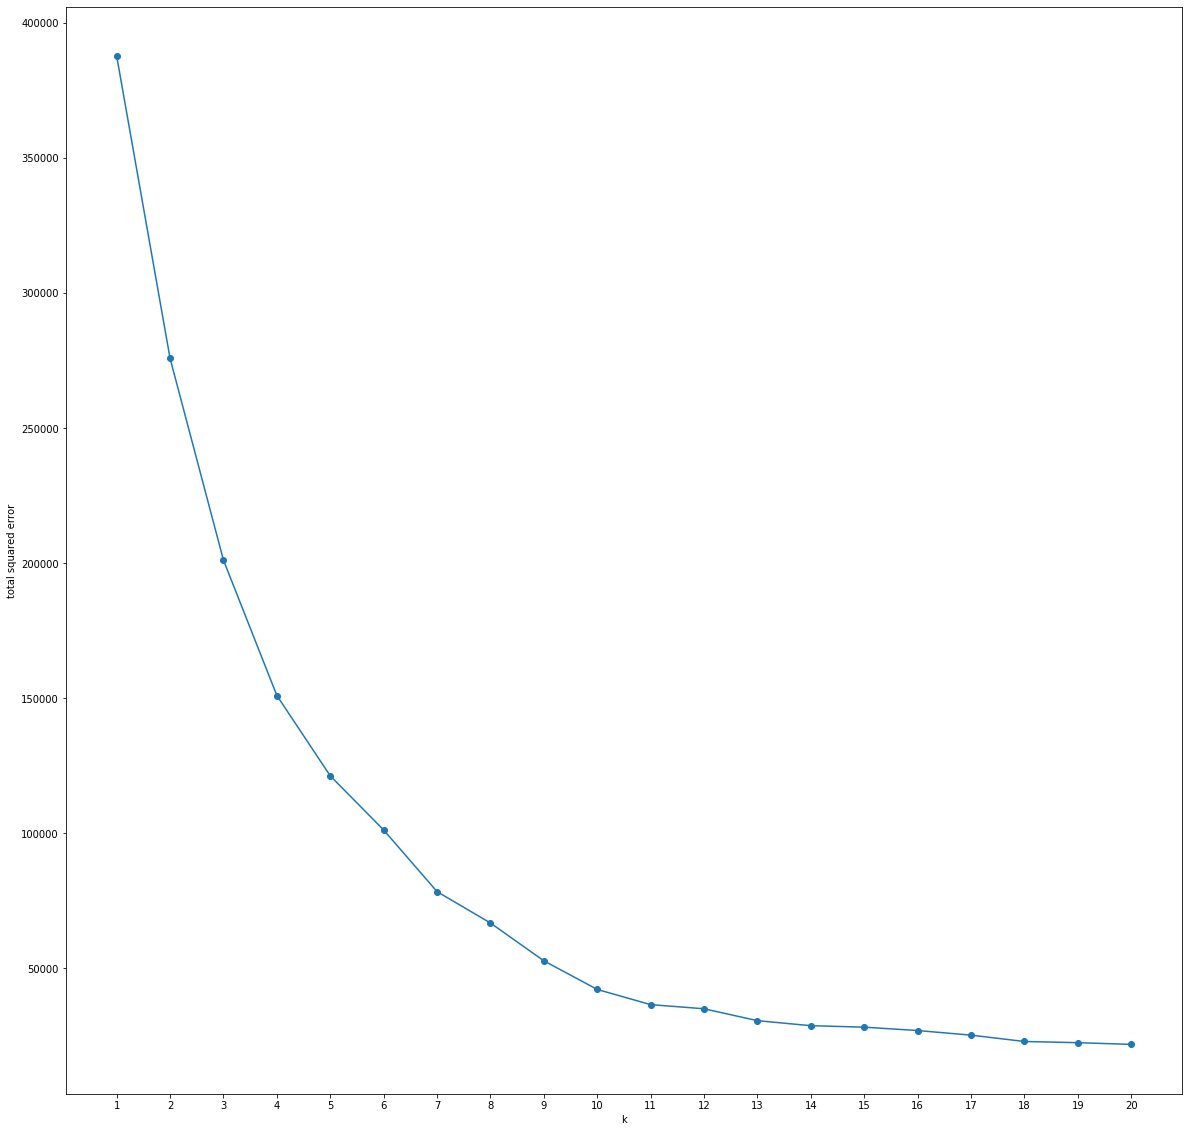

In [240]:
# DO NOT EDIT
plt.figure(figsize=(20,20))
plt.plot(ks3, errors3, '-o')
plt.xticks(ks3)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

### Your output must be similar to the following:
<img src="hw8_1.png">

## Problem 3 (40 pts): Recommender implementation

- Make your own implementaion of item-based recommender system
- You may use the code in textbook, but it may be too slow for large datasets.
- You shouldn't import and use any module implementing recommender system directly
- Use cosine similarity for item similarity (Assume that all null values are zero)

- We will use movie rating dataset

In [241]:
import pandas as pd

movies = pd.read_csv('movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [242]:
movies.count()

movieId    9742
title      9742
genres     9742
dtype: int64

In [243]:
ratings = pd.read_csv('ratings.csv')
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [244]:
ratings.count()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

## The following is top 10 recommendations of movie titles and their genres  from top 1 to top 10 for user 1
```
Ferris Bueller's Day Off (1986)                   Comedy              
Die Hard (1988)                                   Action|Crime|Thriller
Breakfast Club, The (1985)                        Comedy|Drama        
Fifth Element, The (1997)                         Action|Adventure|Comedy|Sci-Fi
Aliens (1986)                                     Action|Adventure|Horror|Sci-Fi
Mars Attacks! (1996)                              Action|Comedy|Sci-Fi
Sixth Sense, The (1999)                           Drama|Horror|Mystery
Austin Powers: The Spy Who Shagged Me (1999)      Action|Adventure|Comedy
2001: A Space Odyssey (1968)                      Adventure|Drama|Sci-Fi
Terminator 2: Judgment Day (1991)                 Action|Sci-Fi       
```    

## Find top 10 recommendations of movie titles and their genres from top 1 to top 10 for user 2

In [245]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

In [246]:
interest_user_matrix=ratings.pivot_table(values = 'rating',index='movieId',columns='userId',fill_value=0)
df_merge=pd.merge(interest_user_matrix,movies,on='movieId',how='left')
df_merge_title=df_merge['title']
interest_user_matrix.index=df_merge_title
interest_similarities=pd.DataFrame(cosine_similarity(interest_user_matrix,interest_user_matrix))
interest_similarities.index=df_merge_title
interest_similarities.columns=df_merge_title
A=interest_user_matrix[1] #user1이 평가한 점수  all movies
a=A[A>0]#user1이 평가한 점수 본 것만
indexA=list(a.index) #user1 평가한 영화 list
BA=A # 잠시 back up
BA=BA.replace(0,1) #곱할거여서 일단 1로
BAT=BA[:,np.newaxis]
all_by_user1 = interest_similarities[a.index]#user1이 본것만 columns으로
sim_mul_user1=all_by_user1 * BAT
mul_sum=pd.DataFrame(sim_mul_user1.sum(axis=1))
sort_mul_sum=mul_sum.sort_values(by=0,ascending=False)
result=[]
for x in sort_mul_sum.index:
    if len(result) >= 10:
        break
    if x not in  a.index:
        result.append(x)
R=pd.DataFrame(result,columns=['title'])
RESULT=pd.merge(R,movies[['title','genres']],on='title',how='left')
ccc=list(RESULT['title'])
RESULT

,title,genres
0,Ferris Bueller's Day Off (1986),Comedy
1,Die Hard (1988),Action|Crime|Thriller
2,"Fifth Element, The (1997)",Action|Adventure|Comedy|Sci-Fi
3,"Breakfast Club, The (1985)",Comedy|Drama
4,Mars Attacks! (1996),Action|Comedy|Sci-Fi
5,Aliens (1986),Action|Adventure|Horror|Sci-Fi
6,"Sixth Sense, The (1999)",Drama|Horror|Mystery
7,Austin Powers: The Spy Who Shagged Me (1999),Action|Adventure|Comedy
8,Terminator 2: Judgment Day (1991),Action|Sci-Fi
9,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi


In [247]:
interest_user_matrix=ratings.pivot_table(values = 'rating',index='movieId',columns='userId',fill_value=0)
df_merge=pd.merge(interest_user_matrix,movies,on='movieId',how='left')
df_merge_title=df_merge['title']
interest_user_matrix.index=df_merge_title
interest_similarities=pd.DataFrame(cosine_similarity(interest_user_matrix,interest_user_matrix))
interest_similarities.index=df_merge_title
interest_similarities.columns=df_merge_title
A=interest_user_matrix[2] #user1이 평가한 점수  all movies
a=A[A>0]#user1이 평가한 점수 본 것만
indexA=list(a.index) #user1 평가한 영화 list
BA=A # 잠시 back up
BA=BA.replace(0,1) #곱할거여서 일단 1로
BAT=BA[:,np.newaxis]
all_by_user1 = interest_similarities[a.index]#user1이 본것만 columns으로
sim_mul_user1=all_by_user1 * BAT
mul_sum=pd.DataFrame(sim_mul_user1.sum(axis=1))
sort_mul_sum=mul_sum.sort_values(by=0,ascending=False)
result=[]
for x in sort_mul_sum.index:
    if len(result) >= 10:
        break
    if x not in  a.index:
        result.append(x)
R=pd.DataFrame(result,columns=['title'])
RESULT=pd.merge(R,movies[['title','genres']],on='title',how='left')
ccc=list(RESULT['title'])
RESULT

,title,genres
0,"Hangover, The (2009)",Comedy|Crime
1,Fight Club (1999),Action|Crime|Drama|Thriller
2,Batman Begins (2005),Action|Crime|IMAX
3,"Social Network, The (2010)",Drama
4,Iron Man (2008),Action|Adventure|Sci-Fi
5,Scott Pilgrim vs. the World (2010),Action|Comedy|Fantasy|Musical|Romance
6,Sherlock Holmes (2009),Action|Crime|Mystery|Thriller
7,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
8,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller
9,Kill Bill: Vol. 2 (2004),Action|Drama|Thriller


## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run **all cells**
- Goto "File -> Print Preview" (If that doesn't work, you may print ipynb file in Google Chrome print menu)
- Print the page as pdf
- Submit the pdf file in google classroom
- No late homeworks accepted